In [17]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [7]:
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "/train_df_ohe_selected.csv", keep_default_na=False)

X = train_df_ohe_selected.iloc[:,:-1] # (transformed) attributes
y = train_df_ohe_selected.iloc[:,-1]  # ground truth labels

In [5]:
# run in terminal: python -m pip install mlxtend
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-3-stacked-cv-classification-and-gridsearch
import mlxtend
from mlxtend.classifier import StackingCVClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# gaussian NB
gnb = GaussianNB()

# linear svm
linearSVM = svm.LinearSVC(random_state=30027, C=1)

# logr
logr = LogisticRegression(solver='sag', max_iter=100)

# decision tree
dt = DecisionTreeClassifier(max_depth = 200, random_state = 30027)

# knn
knn = KNeighborsClassifier(n_neighbors=1)


In [19]:
sclf = StackingCVClassifier(classifiers=[gnb, linearSVM, logr, dt, knn], 
                            meta_classifier=LogisticRegression(),
                            cv = 2,
                            random_state=30027)

In [ ]:
sclf.get_params()

In [24]:
param_grid = {'linearsvc__C': range(1,11,5), 
              'decisiontreeclassifier__max_depth': range(200, 401, 50), 
              'kneighborsclassifier__n_neighbors': range(1,6)}

grid = tune_hyperparameter(sclf, param_grid, X, y, cv=2)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=1, linearsvc__C=1; total time= 1.1min
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=1, linearsvc__C=1; total time=  56.3s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=1, linearsvc__C=6; total time=  44.2s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=1, linearsvc__C=6; total time=  46.0s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=2, linearsvc__C=1; total time=  43.8s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=2, linearsvc__C=1; total time=  45.3s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=2, linearsvc__C=6; total time=  50.3s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=2, linearsvc__C=

[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=3, linearsvc__C=1; total time=  41.0s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=3, linearsvc__C=1; total time=  42.5s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=3, linearsvc__C=6; total time=  45.2s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=3, linearsvc__C=6; total time=  45.6s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=4, linearsvc__C=1; total time=  43.0s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=4, linearsvc__C=1; total time=  48.0s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=4, linearsvc__C=6; total time=  44.9s
[CV] END decisiontreeclassifier__max_depth=350, kneighborsclassifier__n_neighbors=4, linearsvc__C=6; total time=  43.5s
[CV] END decisiontreeclassifier__max_dep

In [33]:
r = re.compile('(^(rank_test).*(f1-score|accuracy)$)|(mean_test_accuracy)|(params)')
score_metrics = list(filter(r.match, grid.columns))
grid.loc[grid['rank_test_5.0_precision'] < 20][score_metrics]
# all except for 1 hyperparameter assignments give 5.0 f1 score = 0 hence all rated second

,params,rank_test_3.0_f1-score,rank_test_4.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,rank_test_accuracy
0,"{'decisiontreeclassifier__max_depth': 200, 'kn...",18,23,2,0.714261,18
1,"{'decisiontreeclassifier__max_depth': 200, 'kn...",23,8,2,0.715085,1
2,"{'decisiontreeclassifier__max_depth': 200, 'kn...",32,31,2,0.712917,46
3,"{'decisiontreeclassifier__max_depth': 200, 'kn...",34,5,2,0.715041,2
4,"{'decisiontreeclassifier__max_depth': 200, 'kn...",14,45,2,0.713524,36
5,"{'decisiontreeclassifier__max_depth': 200, 'kn...",43,26,2,0.712830,48
6,"{'decisiontreeclassifier__max_depth': 200, 'kn...",2,47,2,0.713827,30
7,"{'decisiontreeclassifier__max_depth': 200, 'kn...",35,13,2,0.714434,13
8,"{'decisiontreeclassifier__max_depth': 200, 'kn...",7,50,2,0.713394,38
9,"{'decisiontreeclassifier__max_depth': 200, 'kn...",42,3,2,0.714738,6


In [34]:
grid.loc[grid['rank_test_5.0_precision'] == 1]['params'].values

array([{'decisiontreeclassifier__max_depth': 400, 'kneighborsclassifier__n_neighbors': 3, 'linearsvc__C': 1}],
      dtype=object)

In [26]:
print(max(grid['mean_test_accuracy']))
grid.loc[grid['mean_test_accuracy'] == max(grid['mean_test_accuracy'])]['params'].values

0.7150847541139385


array([{'decisiontreeclassifier__max_depth': 200, 'kneighborsclassifier__n_neighbors': 1, 'linearsvc__C': 6}],
      dtype=object)

In [35]:
# gaussian NB
gnb = GaussianNB()

# linear svm
linearSVM = svm.LinearSVC(random_state=30027, C=1)

# logr
logr = LogisticRegression(solver='sag', max_iter=100)

# decision tree
dt = DecisionTreeClassifier(max_depth = 400, random_state = 30027)

# knn
knn = KNeighborsClassifier(n_neighbors=3)

sclf = StackingCVClassifier(classifiers=[gnb, linearSVM, logr, dt, knn], 
                            meta_classifier=LogisticRegression(),
                            cv = 2,
                            random_state=30027)


StackingCVClassifier prediction took 747.4265389442444 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.254054           0.827988           0.019802       0.718249
1           0.214592           0.830406           0.000000       0.719116
2           0.224751           0.831189           0.019608       0.720850
3           0.182857           0.826030           0.019802       0.710755
4           0.272109           0.833245           0.000000       0.725932
5           0.230337           0.830000           0.000000       0.719428
6           0.234463           0.831449           0.000000       0.721596
7           0.253444           0.831793           0.000000       0.722897
8           0.253095           0.830119           0.000000       0.721162
9           0.227209           0.830526           0.000000       0.719428


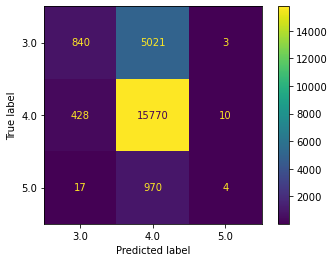

test_3.0_f1-score    0.234691
test_4.0_f1-score    0.830275
test_5.0_f1-score    0.005921
test_accuracy        0.719941
dtype: float64

In [36]:
y_pred, sclf_report = cross_val_report(sclf, X, y)
sclf_report